### 1. Data collection
Get data from twitter api

In [7]:
import tweepy
import json

with open('../assets/token.json', 'r') as f:
    token = json.loads(f.read())

auth = tweepy.OAuthHandler(
    token['api_key'], 
    token['api_key_secret']    
)
auth.set_access_token(
    token['access_token'], 
    token['access_token_secret']
)
api = tweepy.API(auth)

In [8]:
response = api.search_tweets(q='semeru', lang='id', count=200)

In [9]:
import pandas as pd
tweets = []
for res in response:
    tweets.append(res.text)
    
df = pd.DataFrame(data=tweets, columns=["tweet"])
df.head()

,tweet
0,RT @OniMeniq74: Tanggap darurat &amp; gerak c...
1,RT @PKSPekayon: Gerak Cepat Relawan PKS membua...
2,RT @_leonSR_: UTAMAKAN PENYELAMATAN WARGA\n\nK...
3,RT @Persija_Jkt: Mari sejenak memanjatkan doa ...
4,RT @RadioElshinta: Korban Semeru sebagian di r...


### 2. Clean dataset
 

In [10]:
import numpy as np
import string, re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from Sastrawi.Stemmer.StemmerFactory import  StemmerFactory

In [11]:
# Case folding
df["clean_tweet"] = df["tweet"].apply(lambda x: x.lower())
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: re.sub(
    r"\d+|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
).strip())
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: x.strip())
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: x.translate(x.maketrans("", "", string.punctuation))
)

df.head()

,tweet,clean_tweet
0,RT @OniMeniq74: Tanggap darurat &amp; gerak c...,rt tanggap darurat amp gerak cepat bumn ...
1,RT @PKSPekayon: Gerak Cepat Relawan PKS membua...,rt gerak cepat relawan pks membuat posko di...
2,RT @_leonSR_: UTAMAKAN PENYELAMATAN WARGA\n\nK...,rt leonsr utamakan penyelamatan warga ket...
3,RT @Persija_Jkt: Mari sejenak memanjatkan doa ...,rt jkt mari sejenak memanjatkan doa terbaik...
4,RT @RadioElshinta: Korban Semeru sebagian di r...,rt korban semeru sebagian di rujuk di rsud ...


In [25]:
# remove stop words
blackList = stopwords.words('indonesian')
blackList.extend(["yg", "kok", "dg", "ye", "rt", "ya", "drpd", "nya", "amp"])
# print(type(blackList))

def stopWordRemoval(text):
    textList =  [word for word in text if word not in blackList]
    return " ".join(textList)

df["tokenize"] = df["clean_tweet"].apply(lambda x: word_tokenize(x))
df["clean_tweet"] = df["tokenize"].apply(stopWordRemoval)
df.head()


,tweet,clean_tweet,tokenize
0,RT @OniMeniq74: Tanggap darurat &amp; gerak c...,tanggap darurat gerak cepat bumn bantu masyara...,"[tanggap, darurat, amp, gerak, cepat, bumn, ba..."
1,RT @PKSPekayon: Gerak Cepat Relawan PKS membua...,gerak cepat rawan pks posko daerah bencana let...,"[gerak, cepat, rawan, pks, posko, daerah, benc..."
2,RT @_leonSR_: UTAMAKAN PENYELAMATAN WARGA\n\nK...,leonsr utama selamat warga ketua dpr ri puan m...,"[leonsr, utama, selamat, warga, ketua, dpr, ri..."
3,RT @Persija_Jkt: Mari sejenak memanjatkan doa ...,jkt mari panjat doa saudara saudara kawasan gu...,"[jkt, mari, panjat, doa, saudara, saudara, kaw..."
4,RT @RadioElshinta: Korban Semeru sebagian di r...,korban meru rujuk rsud dr haryoto lumajang jaw...,"[korban, meru, rujuk, rsud, dr, haryoto, lumaj..."


In [26]:
def stemming(text):
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

df["clean_tweet"] = df["clean_tweet"].apply(stemming)
df["tokenize"] = df["clean_tweet"].apply(lambda x:word_tokenize(x))

df.head()

,tweet,clean_tweet,tokenize
0,RT @OniMeniq74: Tanggap darurat &amp; gerak c...,tanggap darurat gerak cepat bumn bantu masyara...,"[tanggap, darurat, gerak, cepat, bumn, bantu, ..."
1,RT @PKSPekayon: Gerak Cepat Relawan PKS membua...,gerak cepat rawan pks posko daerah bencana let...,"[gerak, cepat, rawan, pks, posko, daerah, benc..."
2,RT @_leonSR_: UTAMAKAN PENYELAMATAN WARGA\n\nK...,leonsr utama selamat warga ketua dpr ri puan m...,"[leonsr, utama, selamat, warga, ketua, dpr, ri..."
3,RT @Persija_Jkt: Mari sejenak memanjatkan doa ...,jkt mari panjat doa saudara saudara kawasan gu...,"[jkt, mari, panjat, doa, saudara, saudara, kaw..."
4,RT @RadioElshinta: Korban Semeru sebagian di r...,korban meru rujuk rsud dr haryoto lumajang jaw...,"[korban, meru, rujuk, rsud, dr, haryoto, lumaj..."


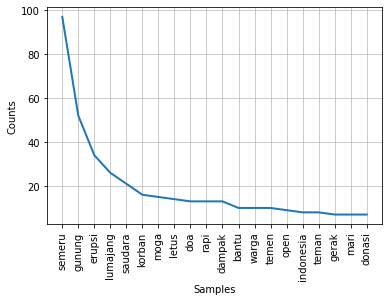

In [27]:
import matplotlib.pyplot as plt 

allTweets = [word if word!="meru" else "semeru" for tweet in df["tokenize"] for word in tweet]
fqdist = FreqDist(allTweets)
fqdist.plot(20, cumulative=False)
plt.show()

In [28]:
import nltk
result = pd.Series(nltk.ngrams(allTweets, 2)).value_counts()[:20]
print(result)

(gunung, semeru)       45
(erupsi, gunung)       19
(dampak, erupsi)       10
(saudara, saudara)      8
(korban, erupsi)        7
(semeru, moga)          6
(stay, safe)            6
(semeru, lumajang)      6
(doa, saudara)          6
(semeru, rapi)          5
(semeru, jatim)         5
(gerak, cepat)          5
(open, donasi)          5
(mari, doa)             5
(lumajang, semeru)      5
(persitiwa, hindar)     4
(bantu, korban)         4
(temen, temen)          4
(rapi, erupsi)          4
(open, donation)        4
dtype: int64


In [29]:
result = pd.Series(nltk.ngrams(allTweets, 3)).value_counts()[:20]
print(result)

(erupsi, gunung, semeru)       19
(dampak, erupsi, gunung)        7
(korban, erupsi, gunung)        7
(letus, gunung, semeru)         4
(exol, lumajang, open)          4
(anak, lahir, lereng)           4
(lahir, lereng, rapi)           4
(lereng, rapi, erupsi)          4
(rapi, erupsi, persitiwa)       4
(erupsi, persitiwa, hindar)     4
(persitiwa, hindar, ajak)       4
(hindar, ajak, kelu)            4
(gunung, semeru, letup)         4
(rombong, ambul, jogja)         4
(gunung, semeru, lumajang)      4
(ambul, jogja, lumajang)        4
(mari, doa, saudara)            4
(semeru, jatim, matursuwun)     4
(jaga, kondisi, sehat)          4
(dulur, jaga, kondisi)          4
dtype: int64


(-0.5, 999.5, 799.5, -0.5)

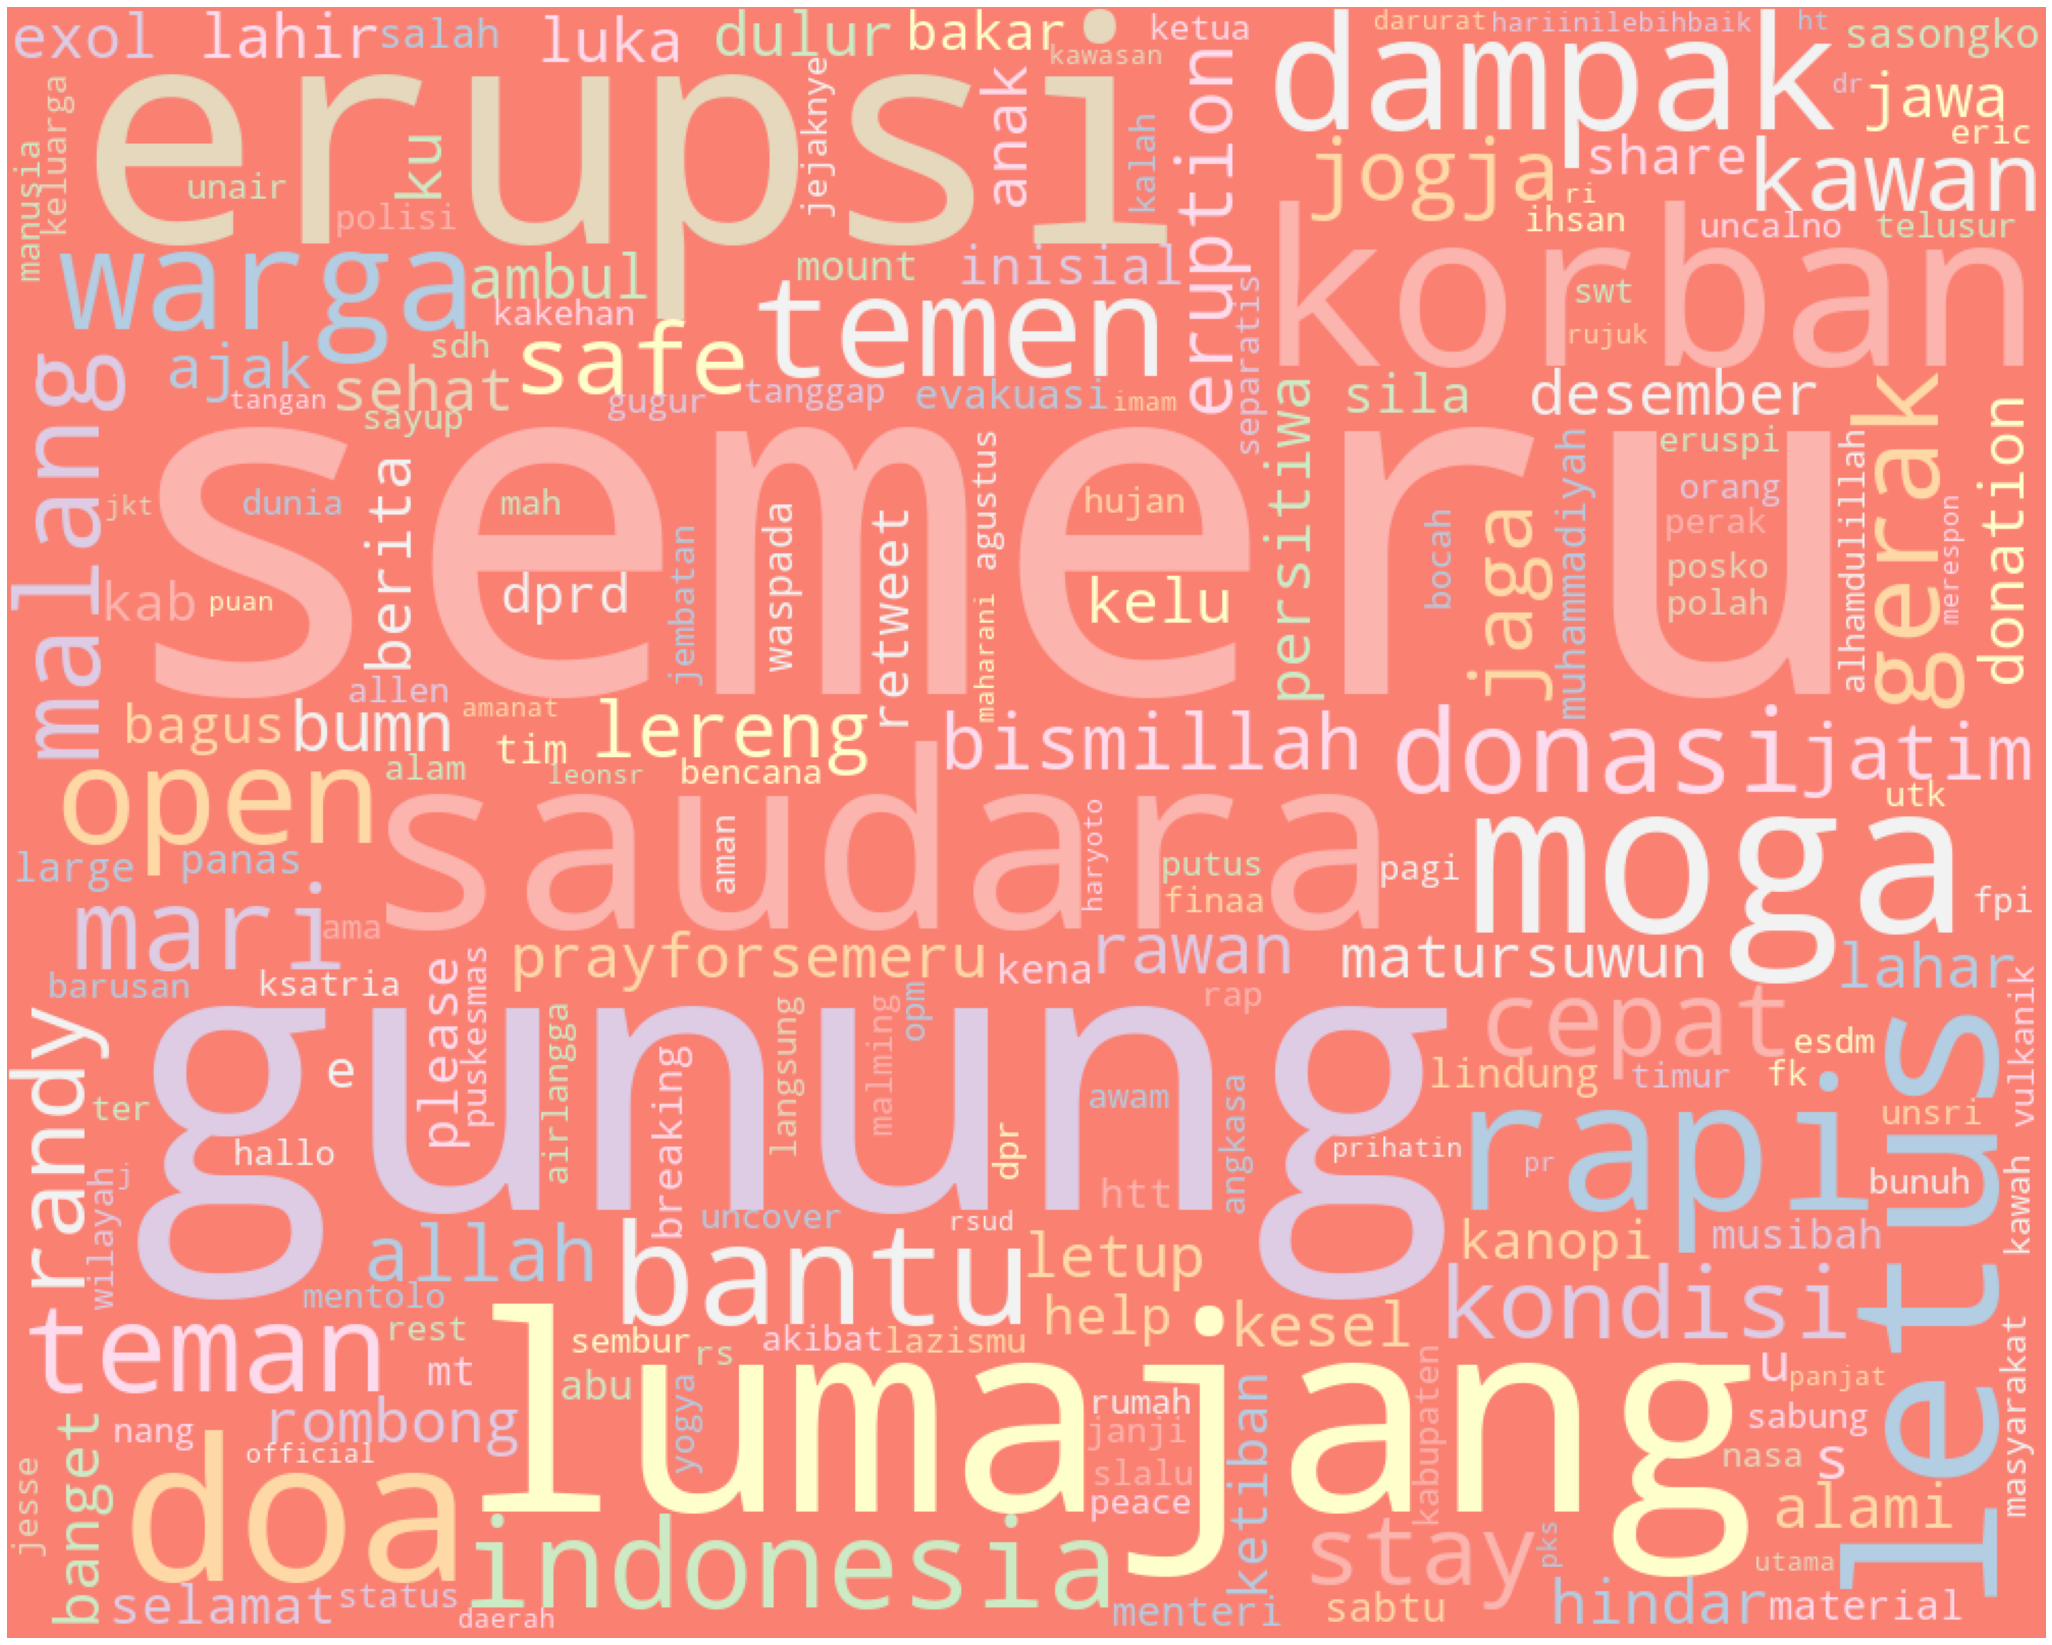

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud(
      width=1000, 
      height=800,
      random_state=1,
      background_color='salmon',
      colormap='Pastel1', 
      collocations=False  
    ).generate(" ".join(allTweets))
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")